# Unzip del archivo

In [1]:
!unzip /content/data_cc.zip -d /content

Archive:  /content/data_cc.zip
   creating: /content/data/
  inflating: /content/data/eng-fra.txt  
   creating: /content/data/names/
  inflating: /content/data/names/Arabic.txt  
  inflating: /content/data/names/Chinese.txt  
  inflating: /content/data/names/Czech.txt  
  inflating: /content/data/names/Dutch.txt  
  inflating: /content/data/names/English.txt  
  inflating: /content/data/names/French.txt  
  inflating: /content/data/names/German.txt  
  inflating: /content/data/names/Greek.txt  
  inflating: /content/data/names/Irish.txt  
  inflating: /content/data/names/Italian.txt  
  inflating: /content/data/names/Japanese.txt  
  inflating: /content/data/names/Korean.txt  
  inflating: /content/data/names/Polish.txt  
  inflating: /content/data/names/Portuguese.txt  
  inflating: /content/data/names/Russian.txt  
  inflating: /content/data/names/Scottish.txt  
  inflating: /content/data/names/Spanish.txt  
  inflating: /content/data/names/Vietnamese.txt  


# Import de librerías

In [2]:
import unicodedata
import glob
import os
import string
from io import open
import torch
import matplotlib.pyplot as plt

# Caracteres

In [3]:
chars=string.ascii_letters+" .,;'-"

In [4]:
chars

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'-"

# Convertir caracteres Unicode a ASCII

In [5]:
#Convertir los caracteres unicode a ascii
def convert_uni_asc(palabra):
  word=""
  pal_norm=unicodedata.normalize("NFD",palabra)
  for pal in pal_norm:
    type_pal=unicodedata.category(pal)
    if type_pal!="Mn":
      word+=pal

  return word

In [6]:
pal="Café"
convert_uni_asc(pal)

'Cafe'

# Leyendo los archivos

In [19]:
#Función para encontrar la ruta de todos los archivos en la ruta "path"
def find_file(path):
  return glob.glob(path)

In [11]:
#De unicode String a ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in chars
    )

In [12]:
#Leer un archivo y devolver la lista de palabras en ese documento
def read_lines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip()) for line in some_file]

In [13]:
path_test="./data/names/Chinese.txt"

In [14]:
res=read_lines(path_test)
print(res)

['Ang', 'Au-Yong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao', 'Cen', 'Chai', 'Chaim', 'Chan', 'Chang', 'Chao', 'Che', 'Chen', 'Cheng', 'Cheung', 'Chew', 'Chieu', 'Chin', 'Chong', 'Chou', 'Chu', 'Cui', 'Dai', 'Deng', 'Ding', 'Dong', 'Dou', 'Duan', 'Eng', 'Fan', 'Fei', 'Feng', 'Foong', 'Fung', 'Gan', 'Gauk', 'Geng', 'Gim', 'Gok', 'Gong', 'Guan', 'Guang', 'Guo', 'Gwock', 'Han', 'Hang', 'Hao', 'Hew', 'Hiu', 'Hong', 'Hor', 'Hsiao', 'Hua', 'Huan', 'Huang', 'Hui', 'Huie', 'Huo', 'Jia', 'Jiang', 'Jin', 'Jing', 'Joe', 'Kang', 'Kau', 'Khoo', 'Khu', 'Kong', 'Koo', 'Kwan', 'Kwei', 'Kwong', 'Lai', 'Lam', 'Lang', 'Lau', 'Law', 'Lew', 'Lian', 'Liao', 'Lim', 'Lin', 'Ling', 'Liu', 'Loh', 'Long', 'Loong', 'Luo', 'Mah', 'Mai', 'Mak', 'Mao', 'Mar', 'Mei', 'Meng', 'Miao', 'Min', 'Ming', 'Moy', 'Mui', 'Nie', 'Niu', 'Ou-Yang', 'Ow-Yang', 'Pan', 'Pang', 'Pei', 'Peng', 'Ping', 'Qian', 'Qin', 'Qiu', 'Quan', 'Que', 'Ran', 'Rao', 'Rong', 'Ruan', 'Sam', 'Seah', 'See', 'Seow', 'Seto', 'Sha', 'Shan', '

# Crear el diccionario con la lista de palabras normalizadas correspondientes


In [15]:
n_letters=len(chars)+1 # +1 para marcar el EOS (end of sentence)

In [16]:
dict_data={}
clases=[]

In [17]:
path_main="./data/names/*.txt" #path que se va a buscar

In [20]:
for path in find_file(path_main):
  clase=os.path.splitext(os.path.basename(path))[0] #clase
  palabras_lista=read_lines(path) #palabras del documento

  dict_data[clase]=palabras_lista #al diccionario, a cada clave (clase) le asigno su lista de palabras
  clases.append(clase) #añado la clase

In [21]:
n_categorias=len(clases)

# Preparando el training

In [22]:
import random

In [23]:
#Helper functions para obtener samples de "lenguaje" y "nombre" aleatorio
def random_sample(samples):
  random_num=random.randint(a=1,b=len(samples)-1)

  return samples[random_num]

def random_clase_line():
  clase=random_sample(clases) # 1 clase aleatoria
  line=random_sample(dict_data[clase]) # 1 nombre aleatorio de ese idioma

  return clase,line

In [24]:
#OHE para la categoría (se le va a pasar a la red)
def categoria(cat):
  index_clase=clases.index(cat) #índice de la clase

  ohe_vector=torch.zeros(size=(1,n_categorias)) #vector ohe
  ohe_vector[0][index_clase]=1

  return ohe_vector

In [25]:
#OHE para el input (nombre)
def ohe_input(input):
  ohe_matrix=torch.zeros(size=(len(input),1,n_letters))

  for index_letra in range(len(input)):
    letra=input[index_letra] #letra actual
    ohe_matrix[index_letra][0][chars.find(letra)]=1 #1 para esa letra en el nombre

  return ohe_matrix

In [26]:
#Target para entrenar el modelo (a partir de la segunda letra desde lo actual, obvio, pues es lo que el modelo debe predecir)
def target_tensor(line):
  letras_index=[]
  for letter in range(1,len(line)):
    letras_index.append(chars.find(line[letter])) #index de cada letra de la palabra
    #print("letraa:",chars.find(line[letter]),line[letter]) #DEPURACIÓN
  letras_index.append(n_letters-1) #EOS (normalmente va en el último índice del tamaño del vocabulario)

  return torch.LongTensor(letras_index)

In [28]:
#Función para crear los tensores directos para el entrenamiento
def TrainingExample():
  clase_,line_=random_clase_line() #clase (idioma), line (nombre)

  clase_ohe=categoria(clase_) #ohe de la clase
  line_ohe=ohe_input(line_) #ohe del nombre
  target=target_tensor(line_) #target para entrenar al modelo
  #print("clase:",clase_,"linea:",line_)
  #print("Clasee:",clase_) #DEPURACIÓN
  return clase_ohe,line_ohe,target

# Arquitectura del modelo

In [37]:
import torch
import torch.nn as nn

In [38]:
class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(RNN,self).__init__()
    self.hidden_size=hidden_size

    self.i2h=nn.Linear(in_features=n_categorias+input_size+hidden_size,out_features=hidden_size)
    self.i2o=nn.Linear(in_features=n_categorias+input_size+hidden_size,out_features=output_size)
    self.o2o=nn.Linear(in_features=hidden_size+output_size,out_features=output_size)

    self.dropout=nn.Dropout(p=0.1)
    self.logsoftmax=nn.LogSoftmax(dim=1)

  def forward(self,category,input,hidden):
    input_combined=torch.cat((category,input,hidden),dim=1) #input combinados (category+input+hidden)

    hidden=self.i2h(input_combined) #hidden state
    output=self.i2o(input_combined) #output

    output_combined=torch.cat((hidden,output),dim=1)  #shape (hiden: hidden_size features,output: output_size features)

    output=self.o2o(output_combined) #output combined salida

    output=self.dropout(output) #droput
    output=self.logsoftmax(output) #logsoftmax: salida de output_size neuronas con log de probabilidades

    return output,hidden

  def initHidden(self):
    return torch.zeros(size=(1,self.hidden_size)) #inicialización del hidden state

# Entrenamiento del modelo

In [39]:
criterion=nn.NLLLoss() #Para calcular el loss
learning_rate=0.0005 #Learning Rate

In [40]:
def train(category_tensor,input_line_tensor,target_line_tensor):
  target_line_tensor=target_line_tensor.unsqueeze_(-1) #Target de shape (n_targets,1); pues cada 'target' es un 1 dim y n_targets se podría ver como cada sample
  #print("target line tensor:",target_line_tensor) #depuración
  hidden=rnn.initHidden()

  loss=torch.Tensor([0]) #Aquí almaceno el loss

  rnn.zero_grad() #En caso se hayan calculado gradientes, los vuelvo a cero para evitar la acumulación de gradientes por Nombre o Palabra

  #Letra por letra (del nombre) paso a la red y voy acumulando en loss
  for index in range(input_line_tensor.size(0)):

    letter_ohe=input_line_tensor[index] #OHE de esa letra

    output,hidden=rnn(category_tensor,letter_ohe,hidden) #output (log probs de la sig. posible palabra según el modelo) y hidden state --> Recursividad del hidden state aquí

    target_real=target_line_tensor[index] #Obtengo el target REAL (la palabra inmediatamente después de la actual, pues se guardó los targets desde el index = 1, no 0 :) )

    loss+=criterion(output,target_real) #calculo el loss

  #Luego de que se haya calculado el loss para cada NOMBRE, calculo los gradientes para cada peso entrenable (aún no he actualizado los pesos)
  loss.backward()

  #Manualmente, realizo la actualización de los pesos con su gradiente respectivo y el learning rate general "(in-place operation por el "_" luego del add)"
  for p in rnn.parameters():
    p.data.add_(p.grad.data,alpha=-learning_rate)

  return output,loss.item()/input_line_tensor.size(0) #Promedio del loss del nombre

## Creación de la red e hiperparámetros

In [41]:
rnn=RNN(input_size=n_letters,hidden_size=128,output_size=n_letters) #Creación de la RNN

In [42]:
n_iters=100000
losses=[]
total_loss=0
plot_every=500 #Cada cuánto tiempo se quiere obtener las métricas

In [43]:
#Entrenamiento
for iter in range(1, n_iters+1):
  output,loss=train(*TrainingExample()) #aquí llamo a la función train

  total_loss+=loss

  if (iter%plot_every)==0:
    losses.append(total_loss/plot_every) #Cada "plot_every" pasos, se obtiene el promedio de ellos
    print(f"Loss: {total_loss/plot_every} en época {iter}")
    total_loss=0 #Se resetea, ya que cada "plot_every" pasos se tiene que calcular un nuevo total_loss para graficar

Loss: 3.975758031142967 en época 500
Loss: 3.660475255702928 en época 1000
Loss: 3.2641265465109632 en época 1500
Loss: 3.167421641633704 en época 2000
Loss: 3.0993132669076506 en época 2500
Loss: 3.069671367241501 en época 3000
Loss: 3.0058837923904727 en época 3500
Loss: 2.978802480562029 en época 4000
Loss: 3.0007409557141393 en época 4500
Loss: 2.9630420817067535 en época 5000
Loss: 2.9501688930218353 en época 5500
Loss: 2.9277937631308752 en época 6000
Loss: 2.9206471698292553 en época 6500
Loss: 2.891688222643842 en época 7000
Loss: 2.873528754353647 en época 7500
Loss: 2.860563024045984 en época 8000
Loss: 2.8305160372903315 en época 8500
Loss: 2.842861889231632 en época 9000
Loss: 2.8130895298660756 en época 9500
Loss: 2.8050793836983305 en época 10000
Loss: 2.7791042520621394 en época 10500
Loss: 2.749776760170454 en época 11000
Loss: 2.769713103253092 en época 11500
Loss: 2.734598377969696 en época 12000
Loss: 2.723194981709132 en época 12500
Loss: 2.7113226769321437 en época

# Gráfica del training step

Text(0.5, 1.0, 'Training Loss')

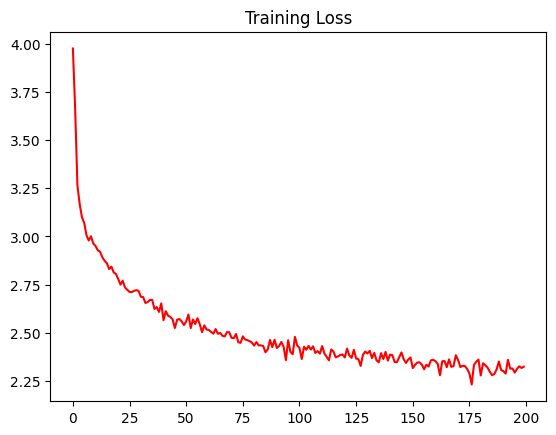

In [44]:
plt.plot(losses,color="red")
plt.title("Training Loss")

# Prueba de la red

In [45]:
#Max length (cantidad de letras máximas por palabra)
max_length=20

In [46]:
def sample(category,letra_inicial):
  pal=f"{letra_inicial}"

  category_ohe=categoria(category) #categoría en ohe
  input_ohe=ohe_input(letra_inicial) #input en ohe
  hidden=rnn.initHidden() #hidden state inicial

  with torch.no_grad():
    rnn.eval()

    for i in range(max_length):
      output,hidden=rnn(category_ohe,input_ohe[0],hidden) #Predicción del modelo (uso el hidden de manera RECURSIVA, pues es RNN :D)

      if torch.argmax(output,dim=1).item()==(n_letters-1): #Se detiene si la predicción es EOS (index último de n_letters)
        break

      else: #De lo contrario, añade la palabra nueva predicha
        pal+=chars[torch.argmax(output,dim=1).item()]


      #Actualizo la palabra actual (input actual) por la nueva predicha
      letra_nueva_predicha=chars[torch.argmax(output,dim=1).item()]
      input_ohe=ohe_input(letra_nueva_predicha)

      #print(f"Letra nueva predicha {letra_nueva_predicha}")

  return pal #Retorno la palabra

In [49]:
#Pruebas
palabra=sample(category="Japanese",letra_inicial="O")
print(palabra)

Oaka
